# Processing a Folder of Tip Logs
Tim Tyree<br>
6.22.2021

In [1]:
from lib.my_initialization import *
from lib import *
import trackpy, pandas as pd, numpy as np
# from lib.utils.utils_traj import *
from lib.routines.comp_imsd import *
# from lib.utils.operari import *
# from lib.routines.track_tips import *
# from lib.utils.dist_func import *
# from lib.utils.utils_traj import *

# from lib.routines.compute_trajectories import *
# from lib.routines.dag_log_to_msd import *
# from lib.routines.compute_msd import *
# from lib.measure.bootstrap import bin_and_bootstrap_xy_values
# from lib.utils.utils_traj import get_DT
# from lib.routines import *

%autocall 1
%load_ext autoreload
%autoreload 2
# awareness&chill

Automatic calling is: Smart


# particle tracking by nearest neighbors for a folder of tip logs

In [3]:
# #find file interactively
print("please select a file from within the desired folder.")
file = search_for_file()
# file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/Log/ic001.21_log.csv'
print(file)
# file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_2_param_set_8/Log/ic_200x200.001.12_log.csv'
input_fn=file
# ds=10
# width=10
ds=5
width=200
height=width
DS=ds/width

# # input_fn=search_for_file()
# input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
# df=pd.read_csv(input_fn)
# print(input_fn)
# DT=compute_DT(df,round_t_to_n_digits=3);print(f"the time resolution is {DT} ms.")

trgt='log.csv'
assert(file[-len(trgt):]==trgt)

file_name_list=get_all_files_matching_pattern(file,trgt)
print(f"number of files in list: {len(file_name_list)}")
os.chdir(nb_dir)

please select a file from within the desired folder.
File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/Log/ic200x200.0.3_log.csv
/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/Log/ic200x200.0.3_log.csv
number of files in list: 324


In [4]:
# df.head()

#Does df need to have the column, 'frame'?

In [5]:
#works for repositories outside of care
input_fn=file
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
ic_suite_fn=os.path.dirname(trial_folder_name)
# ic_suite_fn=ic_suite_fn.split('/')[-1]
print(ic_suite_fn)
trial_folder_name=trial_folder_name.split('/')[-1]
print(trial_folder_name)

/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200
param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025


In [6]:
# input_fn=file
# os.path.dirname(input_fn)
# str_lst=input_fn[input_fn.find('/Data/')+len('/Data/'):].split('/')
# ic_suite_fn=f"{nb_dir}/Data/"+str_lst[0]
# trial_folder_name=str_lst[1]
# print(ic_suite_fn)
# print(trial_folder_name)

In [7]:
#generate trajectories, unwrapped trajectories, and mean squared displacements for folder of tip logs
npartitions=os.cpu_count()

# #particle models
# ds=10
# width=10
# kwargs={
#     'input_fn_lst':file_name_list,
#     'L':width,
#     'DS':ds/width,
#     'use_cache_0':True,
#     'use_cache_1':True,
#     'npartitions':npartitions,
#     'sr':3*width,
#     'mem':0,
#     'trial_folder_name':trial_folder_name,
#     'ic_suite_fn':ic_suite_fn
# }

#full models
ds=5
width=200
kwargs={
    'input_fn_lst':file_name_list,
    'L':width,
    'DS':ds/width,
    'use_cache_0':True,
    'use_cache_1':True,
    'npartitions':npartitions,
    'sr':3*width,
    'mem':0,
    'trial_folder_name':trial_folder_name,
    'ic_suite_fn':ic_suite_fn
}


In [8]:
df_summary=workflow_reduce_logs_to_diffcoeff_summary(**kwargs)
beep(1)

Frame 148671: 2 trajectories present.
reducing 324 unwrapped trajectories files to a single row describing the diffusion coefficient of spiral tips for that trial...
Num. file names in list = 324.
saved figure in 
	/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/msd/fig
saved figure in 
	/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/msd/fig
saved figure in 
	/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/msd/fig
generating diffcoeff_figures for param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025
	num. trials that didn't show a tip lasing longer than 150ms is 0, and that didn't show am Rsquared of at least 0.0 is 61
saved diffcoeff_summary to /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200

0

In [20]:
#TODO: fix D and Delta_D measurements for functions that compute df_summary

# analyze annihilation/creation events

## annihilation events

In [63]:
#select a file from trajectories/
# input_fn=search_for_file()

# #particle model
# input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/trajectories/pbc_particle_log81_traj_sr_30_mem_0.csv"

#DONE: attraction with annihilation and with diffusion
input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log3_log.csv"

#TODO: attraction with annihilation but without diffusion
input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_0_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log1_log.csv"

ds=10
width=10
pid_col='pid_explicit'


#LR
# # input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/trajectories/ic001.21_traj_sr_600_mem_0.csv'
# # # input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
# # input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic002.23_traj_sr_600_mem_0.csv'
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic004.13_traj_sr_600_mem_0.csv'

# #FK
# # input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
# ds=5
# width=200

height=width
df=pd.read_csv(input_fn);print(input_fn)
DT=get_DT(df,pid_col=pid_col);print(f"the time resolution is {DT} ms.")
DS=ds/width

/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_0_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log1_log.csv
the time resolution is 0.25 ms.


In [64]:
trgt=input_fn[input_fn.find('_traj_'):]
# trgt='_traj_sr_600_mem_0.csv'
assert(input_fn[-len(trgt):]==trgt)

file_name_list=get_all_files_matching_pattern(input_fn,trgt)
print(f"number of files in list: {len(file_name_list)}")
os.chdir(nb_dir)

number of files in list: 200


In [65]:
# df.head()

In [115]:
# #particle model
min_duration=40  #20. #ms # a pair of particles is considered if their lifetime is at least min_range
min_range   =0  #cm  # a pair of particles is considered if their max distance is at least min_range
filter_beginning=True
use_min_duration=True
use_grad_voltage=False
range_threshold=10 #cm #filter any deaths occurring at ranges exceeding range_threshold
round_t_to_n_digits=5
tmin=0.  #filter all times earlier than tmin? i think so?

# #full model
# min_duration=20##20. #ms
# min_range   =1.  #cm
# filter_beginning=True
# use_min_duration=True
# use_grad_voltage=True
# tmin=100#ms


# npartitions=1#1
npartitions=os.cpu_count()

kwargs={
    'width':width,
    'height':height,
    'ds':ds,
    'printing':False,
    'min_range':min_range,
    'min_duration':min_duration,
    'npartitions':npartitions,
    'filter_beginning':filter_beginning,
    'use_grad_voltage':use_grad_voltage,
    'use_min_duration':use_min_duration,
    'range_threshold':range_threshold,
    'round_t_to_n_digits':round_t_to_n_digits,
    'tmin':tmin,
    'pid_col':pid_col
}

In [116]:
routine_traj_to_annihilation=get_routine_traj_to_annihilation(**kwargs)
def routine(input_fn):
    return routine_traj_to_annihilation(input_fn)

In [117]:
# df_phases = compute_annihilation_events(input_fn, **kwargs)
get_routine_traj_to_annihilation
# type(df_phases)==type(pd.DataFrame())

<function lib.measure.compute_topological_events.get_routine_traj_to_annihilation(width=200, height=200, ds=5.0, save_folder=None, save_fn=None, **kwargs)>

In [118]:
# #compute interactions
# df_interactions = compute_df_interactions(input_fn, DS=DS,width=width,height=height,tmin=tmin)
# df_interactions.dropna(inplace=True)
# death_ranges = DS * df_interactions.rT.values
# birth_ranges = DS * df_interactions.r0.values
# df_interactions.head()

In [119]:
#find all files matching pattern
trgt_raw='_traj_'
trgt=input_fn[input_fn.find(trgt_raw):]
input_fn_lst=get_all_files_matching_pattern(file=input_fn, trgt=trgt)
print(f"computing features of annihilation events for {len(input_fn_lst)} trajectory .csv files...")
print(f"token example fn: {input_fn_lst[0]}")
#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing features of annihilation events was {time.time()-start:.2f} seconds.")
beep(3)

computing features of annihilation events for 200 trajectory .csv files...
token example fn: /home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_0_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log123_log.csv
run time for computing features of annihilation events was 49.75 seconds.


0

In [120]:
list_of_files=retval
list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]

In [90]:
fn=retval[0]
type(fn)==type(str())
fn

'/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/msd/pbc_particle_log123_log_emsd.csv'

In [122]:
assert (len(list_of_files)>0)

AssertionError: 

In [ ]:
#merge all csv files into one big-ol' csv file
file_out=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),f'annihilations_minr_{min_range}_mindur_{min_duration}.csv')
reval=produce_one_csv(list_of_files, file_out)#, encoding="utf-8")
print('results saved in:')
print(file_out)

## creation events

In [17]:
routine_traj_to_creation=get_routine_traj_to_creation(**kwargs)
def routine(input_fn):
    return routine_traj_to_creation(input_fn)

In [18]:
#find all files matching pattern
trgt_raw='_traj_'
trgt=input_fn[input_fn.find(trgt_raw):]
input_fn_lst=get_all_files_matching_pattern(file=input_fn, trgt=trgt)
print(f"computing features of creation events for {len(input_fn_lst)} trajectory .csv files...")

#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing features of creation events was {time.time()-start:.2f} seconds.")
beep(3)

computing features of creation events for 200 trajectory .csv files...


AttributeError: 'DataFrame' object has no attribute 'particle'

In [ ]:
list_of_files=retval
list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]
# list_of_files=[fn for fn in list_of_files if fn.find('Warning:')==-1]

In [ ]:
print(len(list_of_files))
assert (len(list_of_files)>0)

In [ ]:
#merge all csv files into one big-ol' csv file
file_out=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),f'creations_minr_{min_range}_mindur_{min_duration}.csv')
reval=produce_one_csv(list_of_files, file_out)#, encoding="utf-8")
print('results saved in:')
print(file_out)

In [ ]:
beep(10)

# MSD computation in the bulk

In [3]:
# #input_fn is any sort of trajectory .csv file.  it must have a column reffered to by pid_col that uniquely identifies each particle
# #Load example particle Log file where I want to compute MSD and tracking has already been done 
# #(good): data that uses explicit particle tracking
# # input_fn=search_for_file()
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/Log/pbc_particle_log1_log.csv"
# # input_fn='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/pbc_particle_log69_log.csv'

#TODO?: no attraction, no annihilation
input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/Log/pbc_particle_log1_log.csv"

#TODO: no attraction with annihilation
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/Log/pbc_particle_log1_log.csv"

#DONE: attraction with annihilation
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log1_log.csv"

#TODO: attraction with annihilation but without diffusion
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_0_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log1_log.csv"



#TODO: full models

trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
pid_col='pid_explicit'
t_col='t'
#(bad)particle data analyzed using full model pipeline
# input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories_unwrap/pbc_particle_log121_traj_sr_30_mem_0_unwrap.csv"
df=pd.read_csv(input_fn)
kwargs={}
width=10 #width of computational domain
ds   =10  #cm
#from here on, we will use units in terms of those used by the full model
height=width
DS=ds/width

#unwrap trajectories
pid_lst = sorted(set(df[pid_col].values))
#(duplicates filtered earlier in full model pipeline.  Unnecessary in particle model with explicit tracking_ _  _ _ ) filter_duplicate_trajectory_indices is slow (and can probs be accelerated with a sexy pandas one liner)
# pid_lst_filtered = filter_duplicate_trajectory_indices(pid_lst,df)
df = pd.concat([unwrap_traj_and_center(df[df[pid_col]==pid], width, height, DS, **kwargs) for pid in pid_lst])
DT=get_DT(df,pid_col=pid_col) #ms
df[df.frame==2].describe()

,frame,t,n,x,y,pid_explicit
count,16.0,16.00,16.0,16.000000,16.000000,16.000000
mean,2.0,0.25,16.0,0.009780,0.001405,7.500000
std,0.0,0.00,0.0,0.030812,0.032280,4.760952
min,2.0,0.25,16.0,-0.063857,-0.049938,0.000000
25%,2.0,0.25,16.0,-0.002600,-0.012319,3.750000
50%,2.0,0.25,16.0,0.010339,-0.002505,7.500000
75%,2.0,0.25,16.0,0.030818,0.011225,11.250000
max,2.0,0.25,16.0,0.052833,0.086836,15.000000


In [4]:
#print summary stats on particle lifetimes for one input folder
dft=df.groupby(pid_col)[t_col].describe()
df_lifetimes=-dft[['max','min']].T.diff().loc['min']

print(f"printing summary stats on particle lifetimes for one input folder in {trial_folder_name}:")
print(df_lifetimes.describe())
# print(df_lifetimes.head(10))
print("\nPlease make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by")

printing summary stats on particle lifetimes for one input folder in /home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0:
count      16.0
mean     3000.0
std         0.0
min      3000.0
25%      3000.0
50%      3000.0
75%      3000.0
max      3000.0
Name: min, dtype: float64

Please make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by


In [5]:
minimum_lifetime=500. #ms
crop_start_by=0
crop_end_by=0

In [6]:
width=10
ds   =10  #cm
pid_col='pid_explicit'
t_col='t'

kwargs={
    'DT':DT,
    'ds':ds,
    'width':width,
    'minimum_lifetime':minimum_lifetime,
    'crop_start_by':crop_start_by,
    'crop_end_by':crop_end_by,
    'pid_col':pid_col,
    't_col':t_col,
    'max_lagtime':None
}

In [7]:
use_test=True
#runtime for one file was roughly 40 seconds while sharing with 12 other python processes
if use_test:
    #optionally test the routine
    df_msd=compute_each_mean_squared_displacement(input_fn,**kwargs)
    routine_compute_imsd(input_fn,**kwargs)
    print(f"Head of test df_msd:")
    print(df_msd.head())

def routine(input_fn):
    try:
        return routine_compute_imsd(input_fn,**kwargs)
    except Exception as e:
        return f"Warning: something went wrong, {e}"

Head of test df_msd:
   pid  lagt       msd
0    0  0.25  0.000000
1    0  0.50  0.001994
2    0  0.75  0.004019
3    0  1.00  0.005992
4    0  1.25  0.007945


In [8]:
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
npartitions=os.cpu_count()
input_fn_lst=get_log_files(trial_folder_name, extension='/Log/', trgt='log.csv')
# input_fn_lst=get_log_files(trial_folder_name, extension='', trgt='.csv')
print(f"We're about to use {npartitions} cores to obliterate {len(input_fn_lst)} trajectory files from {trial_folder_name}")

We're about to use 12 cores to obliterate 200 trajectory files from /home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0


In [9]:
#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing mean squared displacements was {time.time()-start:.2f} seconds.")
beep(3)

list_of_files=retval
list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]
# list_of_files=[fn for fn in list_of_files if fn.find('Warning:')==-1]
print(f"wrote {len(list_of_files)} output files to a common folder")
assert (len(list_of_files)>0)

run time for computing mean squared displacements was 218.44 seconds.
wrote 200 output files to a common folder


Estimated run time per trial for MSD calculation is 20 seconds.
- (old ERT: 40 minutes for 200)
- new ERT = 200*20/60/12#min

In [15]:
1

1

In [10]:
#merge all csv files into one big-ol' csv file
file_in=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),f'msd.csv')
reval=produce_one_csv(list_of_files, file_in)#, encoding="utf-8")
print('merged results saved in:')
print(file_in)
beep(10)

merged results saved in:
/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/msd.csv


0

In [11]:
#load an enormous number of samples into a pandas.DataFrame
df_in=pd.read_csv(file_in)
df_in.head()

,index,pid,lagt,msd
0,0,0,0.25,0.000000
1,1,0,0.50,0.001984
2,2,0,0.75,0.003980
3,3,0,1.00,0.005967
4,4,0,1.25,0.007925


In [12]:

# from lib.measure.bootstrap import bin_and_bootstrap_xy_values

#TODO(accelerate bin_and_bootstrap_xy_values): parallelize bootstrapping by putting num_bootstrap_samples into a dask bag
#TODO(if control looks reasonable):

In [14]:
#extract values
lagt_values = df_in['lagt'].values
msd_values = df_in['msd'].values

#bin and bootstrap results
bins = 30#'auto'  #
dict_out = bin_and_bootstrap_xy_values(x=lagt_values,
                                       y=msd_values,
                                       xlabel='lagt',
                                       ylabel=r'msd',
                                       bins=bins,
                                       min_numobs=None,
                                       num_bootstrap_samples=1000,
                                       npartitions=npartitions)
df_emsd = pd.DataFrame(dict_out)
df_emsd.head()

,lagt,msd,Delta_lagt,Delta_msd,p_lagt,p_msd,counts
0,50.125,0.398585,0.049356,0.000410,0.133183,0.300308,1280000
1,150.125,1.196014,0.049630,0.000576,0.310024,0.498633,1280000
2,250.125,1.991012,0.050780,0.000927,0.410401,0.606388,1280000
3,350.125,2.783765,0.049273,0.001447,0.956396,0.284977,1280000
4,450.125,3.571714,0.050054,0.002094,0.384972,0.605606,1280000


In [16]:
#save ensemble msd
#merge all csv files into one big-ol' csv file
file_out=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),f'ensemble_msd_bins_{bins}')
df_emsd.to_csv(file_out,index=False)
print('merged results saved in:')
print(file_out)
beep(10)

merged results saved in:
/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/ensemble_msd_bins_30


0

In [37]:
list_of_files[0]
3000/25

120.0

In [53]:
#compute the linear fit of bootstrapped msd
df=df_emsd
xscale=0.001 #seconds per ms
xmin=0. #ms
xmax=3000 #ms
xmin*=xscale
xmax*=xscale
x_values=df['lagt'].values*xscale
y_values=df['msd'].values
x_err_values=df['Delta_lagt'].values
y_err_values=df['Delta_msd'].values
counts=df['counts'].values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
boo=(x_values>xmin)&(x_values<xmax)
x=x_values[boo]
y=y_values[boo]
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']*x_values

#(optional) rename specific values
dict_force_fit=dict_force_fit
y_hat_values=y_hat_values

#bluf
print(f"D_apparent={dict_force_fit['m']/4:.6f} +- {dict_force_fit['Delta_m']/4:.6f}")
print(f"the ols fit for diffusion coefficient was computed from {xmin:.3f} to {xmax:.3f} seconds, resulting in D={dict_force_fit['m']/4:.4f} and:")
print_dict(dict_force_fit)
print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
print(f"trial_folder_name: {trial_folder_name}")

D_apparent=1.984273 +- 0.009438
the ols fit for diffusion coefficient was computed from 0.000 to 3.000 seconds, resulting in D=1.9843 and:
m=7.937091361395313
Delta_m=0.03775330527222782
b=-0.049106759447223425
Delta_b=0.0653856477461036
Rsquared=0.9998351224679487
Nobs= 1280107 +- 574
trial_folder_name: /home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0


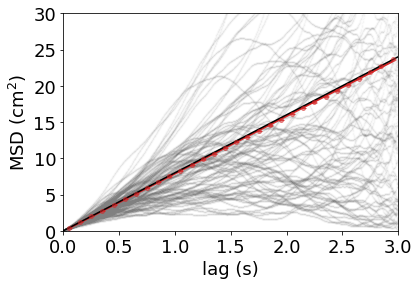

In [66]:
ylim=30
#plot mean radial velocities
fig, ax = plt.subplots(ncols=1, figsize=(6, 4))

lagt_values=df_in['lagt'].values[:1000000:10]
msd_values=df_in['msd'].values[:1000000:10]    
ax.scatter(lagt_values*xscale,msd_values,alpha=0.03,color='gray',s=1)#,alpha=1,color='k')
PlotMeanSquaredDisplacements(ax, x_values, y_values, y_err_values, y_hat_values,c='C3')

xval=(x_values-np.min(x_values))*2
ax.plot(xval,xval*8,'k-')

ax.set_xlim([0,3])
ax.set_ylim([0,ylim])
ax.set_xlabel('lag (s)')
plt.show()

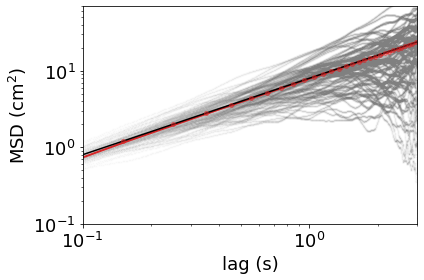

In [69]:
ylim=70
#plot mean radial velocities
fig, ax = plt.subplots(ncols=1, figsize=(6, 4))

lagt_values=df_in['lagt'].values[:1000000:10]
msd_values=df_in['msd'].values[:1000000:10]    
ax.scatter(lagt_values*xscale,msd_values,alpha=0.03,color='gray',s=1)#,alpha=1,color='k')
PlotMeanSquaredDisplacements(ax, x_values, y_values, y_err_values, y_hat_values,c='C3')
xval=(x_values-np.min(x_values))*2
ax.plot(xval,xval*8,'k-')
ax.set_xlim([.1,3])
ax.set_ylim([.1,ylim])
ax.set_xlabel('lag (s)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [74]:
#extract values
x_scale=0.001 #sec per ms
x_values = df_in['lagt'].values*x_scale
y_values = df_in['msd'].values/x_values

#bin and bootstrap results
bins = 30#'auto'  #
dict_out = bin_and_bootstrap_xy_values(x=x_values,
                                       y=y_values,
                                       xlabel='lagt',
                                       ylabel='y',
                                       bins=bins,
                                       min_numobs=None,
                                       num_bootstrap_samples=1000,
                                       npartitions=npartitions)
df_msdt = pd.DataFrame(dict_out)
df_msdt.head()

,lagt,y,Delta_lagt,Delta_y,p_lagt,p_y,counts
0,0.050125,7.863188,0.000050,0.001706,0.850486,0.103151,1280000
1,0.150125,7.967023,0.000048,0.002426,0.445726,0.837202,1280000
2,0.250125,7.960257,0.000051,0.003239,0.995798,0.694219,1280000
3,0.350125,7.951170,0.000050,0.004046,0.878888,0.457383,1280000
4,0.450125,7.935216,0.000052,0.004418,0.300122,0.002007,1280000


In [89]:
#compute D_apparent using a weighted average
j0=1 #first value to use
x=df_msdt['lagt'].values[j0:]
y=df_msdt['y'].values[j0:]/4
y_err=df_msdt['Delta_y'].values[j0:]/4
w=df_msdt['counts'].values[j0:]
w=w/np.sum(w)
D_apparent=np.sum(w*y)
#estimate 95% CI of D_apparent using a weighted average
Delta_D_apparent=np.sqrt(np.sum(w*y_err**2))
print(f"The weighted average of each lag bin was")
print(f"D_apparent={D_apparent:.4f}+-{Delta_D_apparent:.4f} cm^2/s")
print(f"The mean time between two lag bins was {np.mean(np.diff(x)):.3f} seconds")

The weighted average of each lag bin was
D_apparent=1.9760+-0.0024 cm^2/s
The mean time between two lag bins was 0.100 seconds


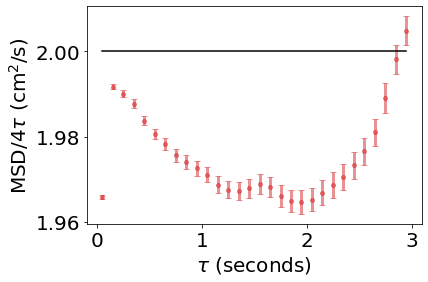

In [80]:
from lib.viewer.plot_func import *
fontsize=18
alpha=0.5
c='C3'
elinewidth=3
markersize=4
capsize=3
fig, ax = plt.subplots(ncols=1, figsize=(6, 4))
#naive plot of MSD/lagt versus lagt
x=df_msdt['lagt'].values
y=df_msdt['y'].values/4
y_err=df_msdt['Delta_y'].values/4
ax.errorbar(x,y,y_err,c=c,
            alpha=alpha,
            fmt='o',
            markersize=markersize,
            ecolor=c,
            elinewidth=elinewidth,
            errorevery=1,
            capsize=capsize
           )
ax.plot(x,0.*x+8/4,'k-')
format_plot_general(ax,xlabel=r'$\tau$ (seconds)',ylabel=r'MSD$/4\tau$ (cm$^2$/s)',fontsize=fontsize,use_loglog=False)#,**kwargs)
plt.show()

In [54]:
# from lib import *
# from lib.viewer.PlotMeanSquaredDisplacements import PlotMeanSquaredDisplacements

# df=pd.read_csv(input_fn)
# #compute t0 and tf for each particle
# dft=df.groupby(pid_col)[t_col].describe()
# dft0=dft['min']
# dftf=dft['max']

# #compute t1 and t2 for each particle
# dft1=dft0+crop_start_by
# dft2=dftf-crop_end_by

# #get the list of particles dft2-dft1 \ge minimum_lifetime
# dflifetime_considered=dft2-dft1
# pid_values_to_consider=dflifetime_considered[dflifetime_considered>=minimum_lifetime].index.values

# # for pid in pid_values_to_consider[:]:
# #     #     lagt_values,msd_values=compute_individual_mean_squared_displacement(df,dft1,dft2,DT,pid,pid_col=pid_col)
# #     lagt_values,msd_values=df_msd_example[df_msd_example['pid']==pid][['lagt','msd']].values.T
# #     ax.plot(lagt_values*xscale,msd_values,alpha=0.4,color='gray')

In [56]:
# df_msd_example=compute_each_mean_squared_displacement(input_fn,**kwargs)
# df_msd_example.head()

In [42]:
beep(5)

0

In [ ]:
# #TODO(later): make text interface for choosing new max_lagtime. Note max_lagtime is in units of frames, not time...
# print(f"If you want to save memory and decrease runtime decide on a reasonable value for max_lagtime!  maxt={max_lagtime}")

#TODO: load all of ^those imsd into python and compute the mean imsd, binning by lagt
#TODO: save resulting emsd to csv
#TODO: generate plots
#TODO: look at plots and decide whether to change the default tau_min and tau_max
#TODO: compute linear regression with tau_min and tau_max

# TODO: compute D as the mean value of D computed on a trial by trial basis.  Bootstrap to compute Delta_D

- DONE: try per trial basis
- TODO: try per particle basis


In [147]:
def compute_D(df,xscale=0.001,xmin=0.,xmax=500.):
    #compute the linear fit of bootstrapped msd
    #     df=df_emsd
    #     xscale=0.001 #seconds per ms
    #     xmin=0. #ms
    #     xmax=500 #ms
    xmin*=xscale
    xmax*=xscale
    x_values=df['lagt'].values*xscale
    y_values=df['msd'].values
    x_err_values=df['Delta_lagt'].values
    y_err_values=df['Delta_msd'].values
    counts=df['counts'].values

    #fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
    boo=(x_values>xmin)&(x_values<xmax)
    x=x_values[boo]
    y=y_values[boo]
    dict_force_fit=compute_95CI_ols(x,y)
    y_hat_values=dict_force_fit['b']+dict_force_fit['m']*x_values

    #(optional) rename specific values
    dict_force_fit=dict_force_fit
    y_hat_values=y_hat_values
    D=dict_force_fit['m']/4
    return D
    
#     #bluf
#     print(f"the ols fit for diffusion coefficient, D={:.4f} is:")
#     print_dict(dict_force_fit)
#     print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
#     print(f"trial_folder_name: {trial_folder_name}")

def return_compute_D(fn,bins='auto'):
    df_in=pd.read_csv(fn)
    #extract values
    lagt_values = df_in['lagt'].values
    msd_values = df_in['msd'].values
    #bin and bootstrap results
    #'auto'  #
    df_emsd = bin_and_bootstrap_xy_values(x=lagt_values,
                                           y=msd_values,
                                           xlabel='lagt',
                                           ylabel=r'msd',
                                           bins=bins,
                                           min_numobs=None,
                                           num_bootstrap_samples=1000,
                                           npartitions=npartitions,
                                         printing=False)
    return compute_D(df_emsd)

def geo_mean_overflow(iterable):
    a = np.log(iterable)
    return np.exp(a.mean())

In [157]:
D_apparent_lst=[]
for fn in list_of_files:
    D_apparent_lst.append(return_compute_D(fn))
    
print(np.mean(D_apparent_lst))
print(np.std(D_apparent_lst))

2.4925620155188772
0.8511114065985788


In [160]:
beep(2)

0

In [176]:
n=13
print(np.gmean(D_apparent_lst[:n]))
print(np.std(D_apparent_lst[:n]))

AttributeError: module 'numpy' has no attribute 'gmean'

In [178]:
import numpy as np

# def geo_mean_overflow(iterable):
#     a = np.log(iterable)
#     return np.exp(a.mean())

geo_mean_overflow(D_apparent_lst),np.median(D_apparent_lst),np.mean(D_apparent_lst)

(2.3836281109259736, 2.212109350053237, 2.4925620155188772)

I doubt computing individual particle's D values will have a significant effect on the average value when breaking up by trial did not...

I think what will be effective is trying a YET SIMPLER FUNCTIONAL FORM FOR MSD

Let
$$
MSD(\tau)=\mathbb{E}\Big[ (r(\tau) - r(0) )^2  \Big]_\text{particles}
$$

In [201]:
df=pd.read_csv(input_fn)
unwrap_trajectories?

In [181]:
pid_col='pid_explicit'
t_values=np.array(sorted(set(df.t.values)))
pid_values=np.array(sorted(set(df[pid_col].values)))

In [185]:
t0=np.min(t_values)
x0_values=df.loc[df.t==t0,'x'].values
y0_values=df.loc[df.t==t0,'y'].values

(16,)

In [211]:
# for pid in pid_values:
#     #select particle and extract trajectory
#     #subtract off initial position
#     #compute the norm / magnitude of the net displacement at each time point
#     #add each time point to a running total at each time point
#     #increment the count of observations at each time point

In [210]:
# xyt_values=df[df[pid_col]==pid][['x','y','t']].values
# xyt_values-=xyt_values[0]
# lag_values=xyt_values[:,-1]
# displacement_values=xyt_values[:,:2]
# displacement_values

In [231]:
# #input_fn is any sort of trajectory .csv file.  it must have a column reffered to by pid_col that uniquely identifies each particle
# #Load example particle Log file where I want to compute MSD and tracking has already been done 
# #(good): data that uses explicit particle tracking
# # input_fn=search_for_file()
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/Log/pbc_particle_log1_log.csv"
# # input_fn='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/pbc_particle_log69_log.csv'

#TODO: no attraction, no annihilation
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/Log/pbc_particle_log1_log.csv"

#TODO: no attraction with annihilation
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/Log/pbc_particle_log1_log.csv"

#TODO: attraction with annihilation

#TODO: attraction with annihilation but without diffusion

#TODO: full models
def return_msd_phys(input_fn):
    df=pd.read_csv(input_fn)
    trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
    pid_col='pid_explicit'
    t_col='t'
    #(bad)particle data analyzed using full model pipeline
    # input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories_unwrap/pbc_particle_log121_traj_sr_30_mem_0_unwrap.csv"
    df=pd.read_csv(input_fn)
    kwargs={}
    width=10 #width of computational domain
    ds   =10  #cm
    #from here on, we will use units in terms of those used by the full model
    height=width
    DS=ds/width

    #unwrap trajectories
    pid_lst = sorted(set(df[pid_col].values))
    #(duplicates filtered earlier in full model pipeline.  Unnecessary in particle model with explicit tracking_ _  _ _ ) filter_duplicate_trajectory_indices is slow (and can probs be accelerated with a sexy pandas one liner)
    # pid_lst_filtered = filter_duplicate_trajectory_indices(pid_lst,df)
    df = pd.concat([unwrap_traj_and_center(df[df[pid_col]==pid], width, height, DS, **kwargs) for pid in pid_lst])
    DT=get_DT(df,pid_col=pid_col) #ms
    df[df.frame==2].describe()

    df.head()

    df['sd']=df['x']**2+df['y']**2
    d_msd=df.groupby('t')['sd'].mean()
    lagt_values=d_msd.index.values
    msd_values=d_msd.values

    xmin=0
    #xmax=100
    xmin*=xscale
    xmax*=xscale
    x_values=lagt_values*xscale
    y_values=msd_values
    # x_err_values=df['Delta_lagt'].values
    # y_err_values=df['Delta_msd'].values
    # counts=df['counts'].values

    #fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
    boo=(x_values>xmin)&(x_values<xmax)
    x=x_values[boo]
    y=y_values[boo]
    dict_force_fit=compute_95CI_ols(x,y)
    y_hat_values=dict_force_fit['b']+dict_force_fit['m']*x_values

    #(optional) rename specific values
    dict_force_fit=dict_force_fit
    y_hat_values=y_hat_values
    D=dict_force_fit['m']/4
    return D

In [214]:
fn = input_fn_lst[0]


2.0513367928686934

In [215]:
#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(return_msd_phys)
start = time.time()
tuple_lst=list(b)
# D_apparent_lst = list(b)
# print(f"run time for computing mean squared displacements was {time.time()-start:.2f} seconds.")
# beep(3)
# print((geo_mean_overflow(D_apparent_lst),np.median(D_apparent_lst),np.mean(D_apparent_lst),np.std(D_apparent_lst)))
# list_of_files=retval
# list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]
# # list_of_files=[fn for fn in list_of_files if fn.find('Warning:')==-1]
# print(f"wrote {len(list_of_files)} output files to a common folder")
# assert (len(list_of_files)>0)

run time for computing mean squared displacements was 386.86 seconds.
(2.2207477027140863, 2.048612039525339, 2.759752260725528, 3.392611667160421)


Testing a straight forward computation of D, where we average over space first...

```
run time for computing mean squared displacements was 386.86 seconds.
(2.2207477027140863, 2.048612039525339, 2.759752260725528, 3.392611667160421)
```

So... Those don't match except for the median...


TODO: try computing the sum and the count for each time bin over all particles found in all trajectory files...


# TODO: bootstrap and plot MSD/lagt versus lagt
- TODO(optional): plot bootstrapped MSD and lagt on a log-log plot
- TODO: bootstrap and plot dR/dt * R versus R